In [1]:
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
import os

import verse.utils.data_utilities as dutils

In [26]:
directory = '/home/pedrofrancescon/Desktop/TCC'

# img_nib = nib.load(os.path.join(directory + '_local', 'images/rawdata/sub-gl216/sub-gl216_dir-ax_ct.nii.gz'))
# img_nib = nib.load(os.path.join(directory + '_local', 'images/rawdata/sub-verse502/sub-verse502_dir-iso_ct.nii.gz'))
# img_nib = nib.load(os.path.join(directory + '_local', 'images/rawdata/sub-verse509/sub-verse509_dir-iso_ct.nii.gz'))
img_nib = nib.load(os.path.join(directory + '_local', 'images/rawdata/sub-verse512/sub-verse512_dir-iso_ct.nii.gz'))
# img_nib = nib.load(os.path.join(directory + '_local', 'images/rawdata/sub-verse810/sub-verse810_dir-iso_ct.nii.gz'))
img_arr = np.asanyarray(img_nib.dataobj)
img_arr.shape

(512, 512, 703)

In [27]:
# ctd_list = dutils.load_centroids(os.path.join(directory,'backend/container/data/results/sub-verse502/sub-verse502_dir-iso_ct_ctd.json'))
# ctd_list = dutils.load_centroids(os.path.join(directory,'backend/container/data/results/sub-verse509/sub-verse509_dir-iso_ct_ctd.json'))
ctd_list = dutils.load_centroids(os.path.join(directory,'backend/container/data/results/sub-verse512/sub-verse512_dir-iso_ct_ctd.json'))

# ctd_list_ref = dutils.load_centroids('/home/pedrofrancescon/Desktop/TCC_local/images/derivatives/sub-verse502/sub-verse502_dir-iso_seg-subreg_ctd.json')
# ctd_list_ref = dutils.load_centroids('/home/pedrofrancescon/Desktop/TCC_local/images/derivatives/sub-verse509/sub-verse509_dir-iso_seg-subreg_ctd.json')
ctd_list_ref = dutils.load_centroids('/home/pedrofrancescon/Desktop/TCC_local/images/derivatives/sub-verse512/sub-verse512_dir-iso_seg-subreg_ctd.json')

In [28]:
ctd_list_ref

[('L', 'A', 'S'),
 [7, 203, 272.3, 671.4],
 [8, 201.8, 257.9, 657.1],
 [9, 199.4, 241.7, 642.4],
 [10, 197.1, 227.4, 624.6],
 [11, 194.6, 216.2, 605.5],
 [12, 192.5, 209, 584.4],
 [13, 192, 201.9, 562.3],
 [14, 193.9, 199.1, 538.6],
 [15, 195, 197.6, 514.1],
 [16, 197.6, 198.6, 489.1],
 [17, 200.1, 201.1, 463.2],
 [18, 205.2, 206.3, 436.5],
 [19, 210.6, 213.2, 407.4],
 [20, 217.1, 223.3, 377.1],
 [21, 223.9, 234.3, 343.3],
 [22, 230.2, 243.2, 305],
 [23, 237.3, 244.6, 265],
 [24, 243.4, 238.4, 224.4]]

In [29]:
ctd_list

[('L', 'A', 'S'),
 [7, 202.804875, 265.33884375, 681.2885380132606],
 [8, 201.118203125, 249.852375, 668.3606134086348],
 [9, 198.947390625, 232.91928124999998, 653.2888627923559],
 [10, 196.6028125, 216.83753124999998, 635.350697712122],
 [11, 194.082125, 205.0574375, 614.1508137954821],
 [12, 192.765375, 197.135625, 590.7516975072144],
 [13, 192.24325, 191.15162500000002, 566.3621840572936],
 [14, 194.28040625, 188.32975, 540.623149358515],
 [15, 195.832046875, 187.23056250000002, 515.3111234058572],
 [16, 197.916578125, 187.73056250000002, 488.8248149242617],
 [17, 200.994859375, 191.41649999999998, 462.26329756480584],
 [18, 205.48940625, 196.54078125, 434.89448851729736],
 [19, 211.87996875, 204.61909375, 405.1843708140154],
 [20, 217.08540625, 213.46856250000002, 373.6719188073455],
 [21, 222.96171875, 223.9916875, 339.7092782049518],
 [22, 229.42053125, 231.90131250000002, 303.4478840151862],
 [23, 236.083984375, 234.22134375000002, 264.55205982399144]]

#### MIP (by amax's axis)

In [30]:
# plt.imshow(np.amax(img_arr, axis=1), cmap="gray")
# plt.imshow(np.amax(np.rot90(img_arr, 1, axes=[1,2]), axis=0), cmap="gray")
# plt.imshow(np.amax(np.rot90(img_arr, 1, axes=[1,2]), axis=0), cmap="gray", extent=[0,1,0,1])

[*] Image resampled to voxel size: (1, 1, 1)
[*] Rescaled centroid coordinates to spacing (x, y, z) = (1, 1, 1) mm


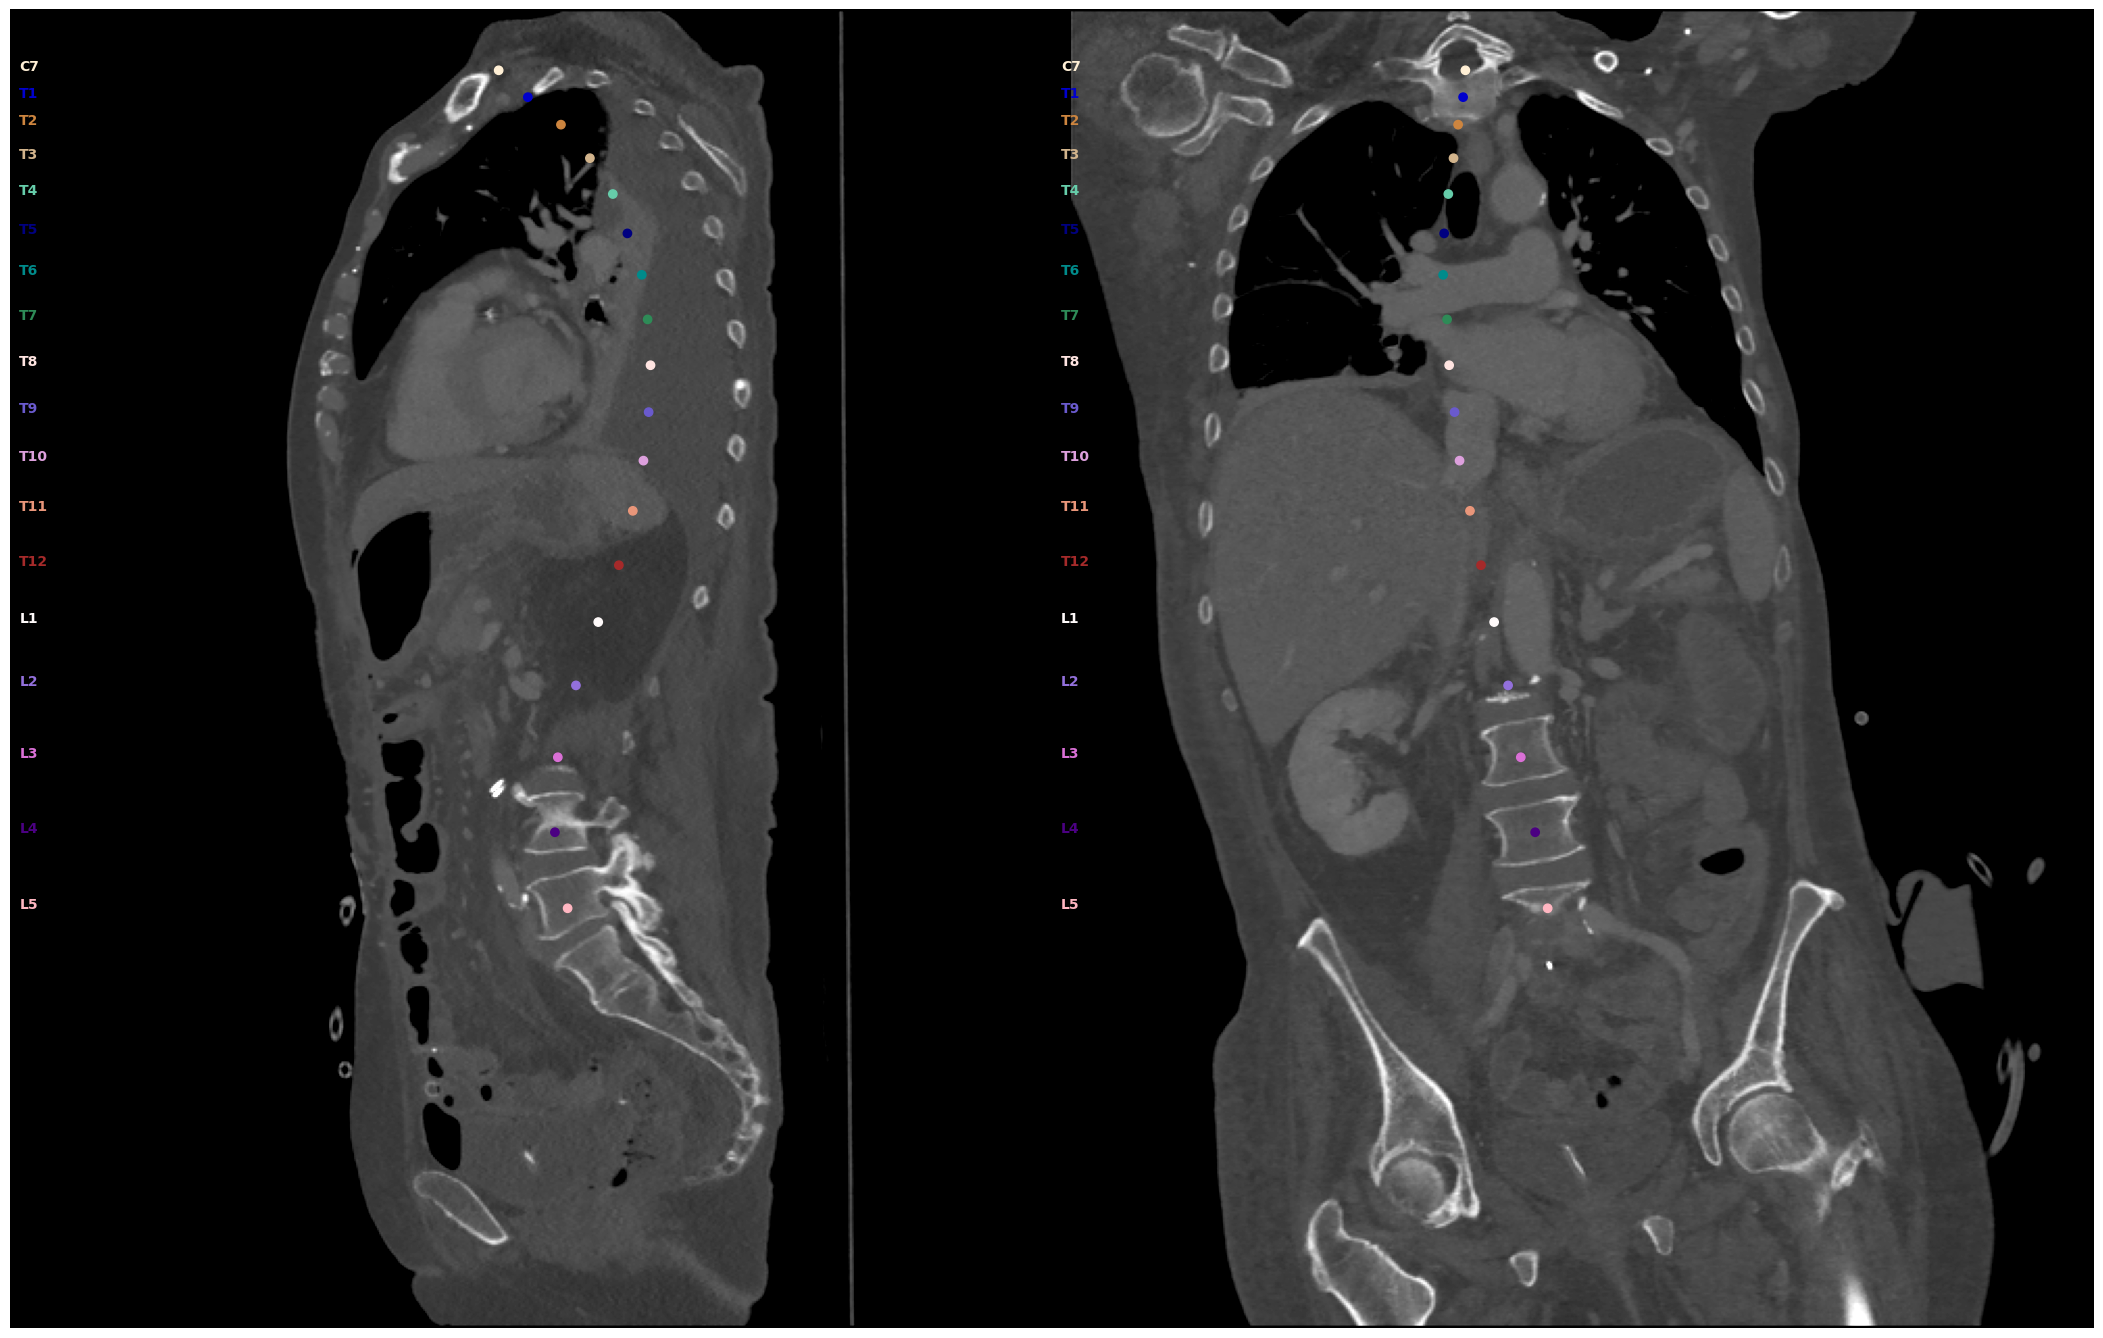

In [31]:
img_iso = dutils.resample_nib(img_nib, voxel_spacing=(1, 1, 1), order=3)
ctd_iso_ref = dutils.rescale_centroids(ctd_list_ref, img_nib, (1,1,1))

img_iso = dutils.reorient_to(img_iso, axcodes_to=('I', 'P', 'L'))
ctd_iso_ref = dutils.reorient_centroids_to(ctd_iso_ref, img_iso)

#check img zooms 
zooms = img_iso.header.get_zooms()
# print('img zooms = {}'.format(zooms))

#check img orientation
# axs_code = nio.ornt2axcodes(nio.io_orientation(img_iso.affine))
# print('img orientation code: {}'.format(axs_code))

#check centroids
# print('new centroids: {}'.format(ctd_iso))

im_np  = img_iso.get_fdata()

im_np_sag = im_np[:,:,int(im_np.shape[2]/2)]
im_np_cor = im_np[:,int(im_np.shape[1]/2),:]

fig, axs = dutils.create_figure(96,im_np_sag, im_np_cor)
axs[0].imshow(im_np_sag, cmap=plt.cm.gray, norm=dutils.wdw_sbone)
dutils.plot_sag_centroids(axs[0], ctd_iso_ref, zooms)

axs[1].imshow(im_np_cor, cmap=plt.cm.gray, norm=dutils.wdw_sbone)
dutils.plot_cor_centroids(axs[1], ctd_iso_ref, zooms)

[*] Rescaled centroid coordinates to spacing (x, y, z) = (1, 1, 1) mm


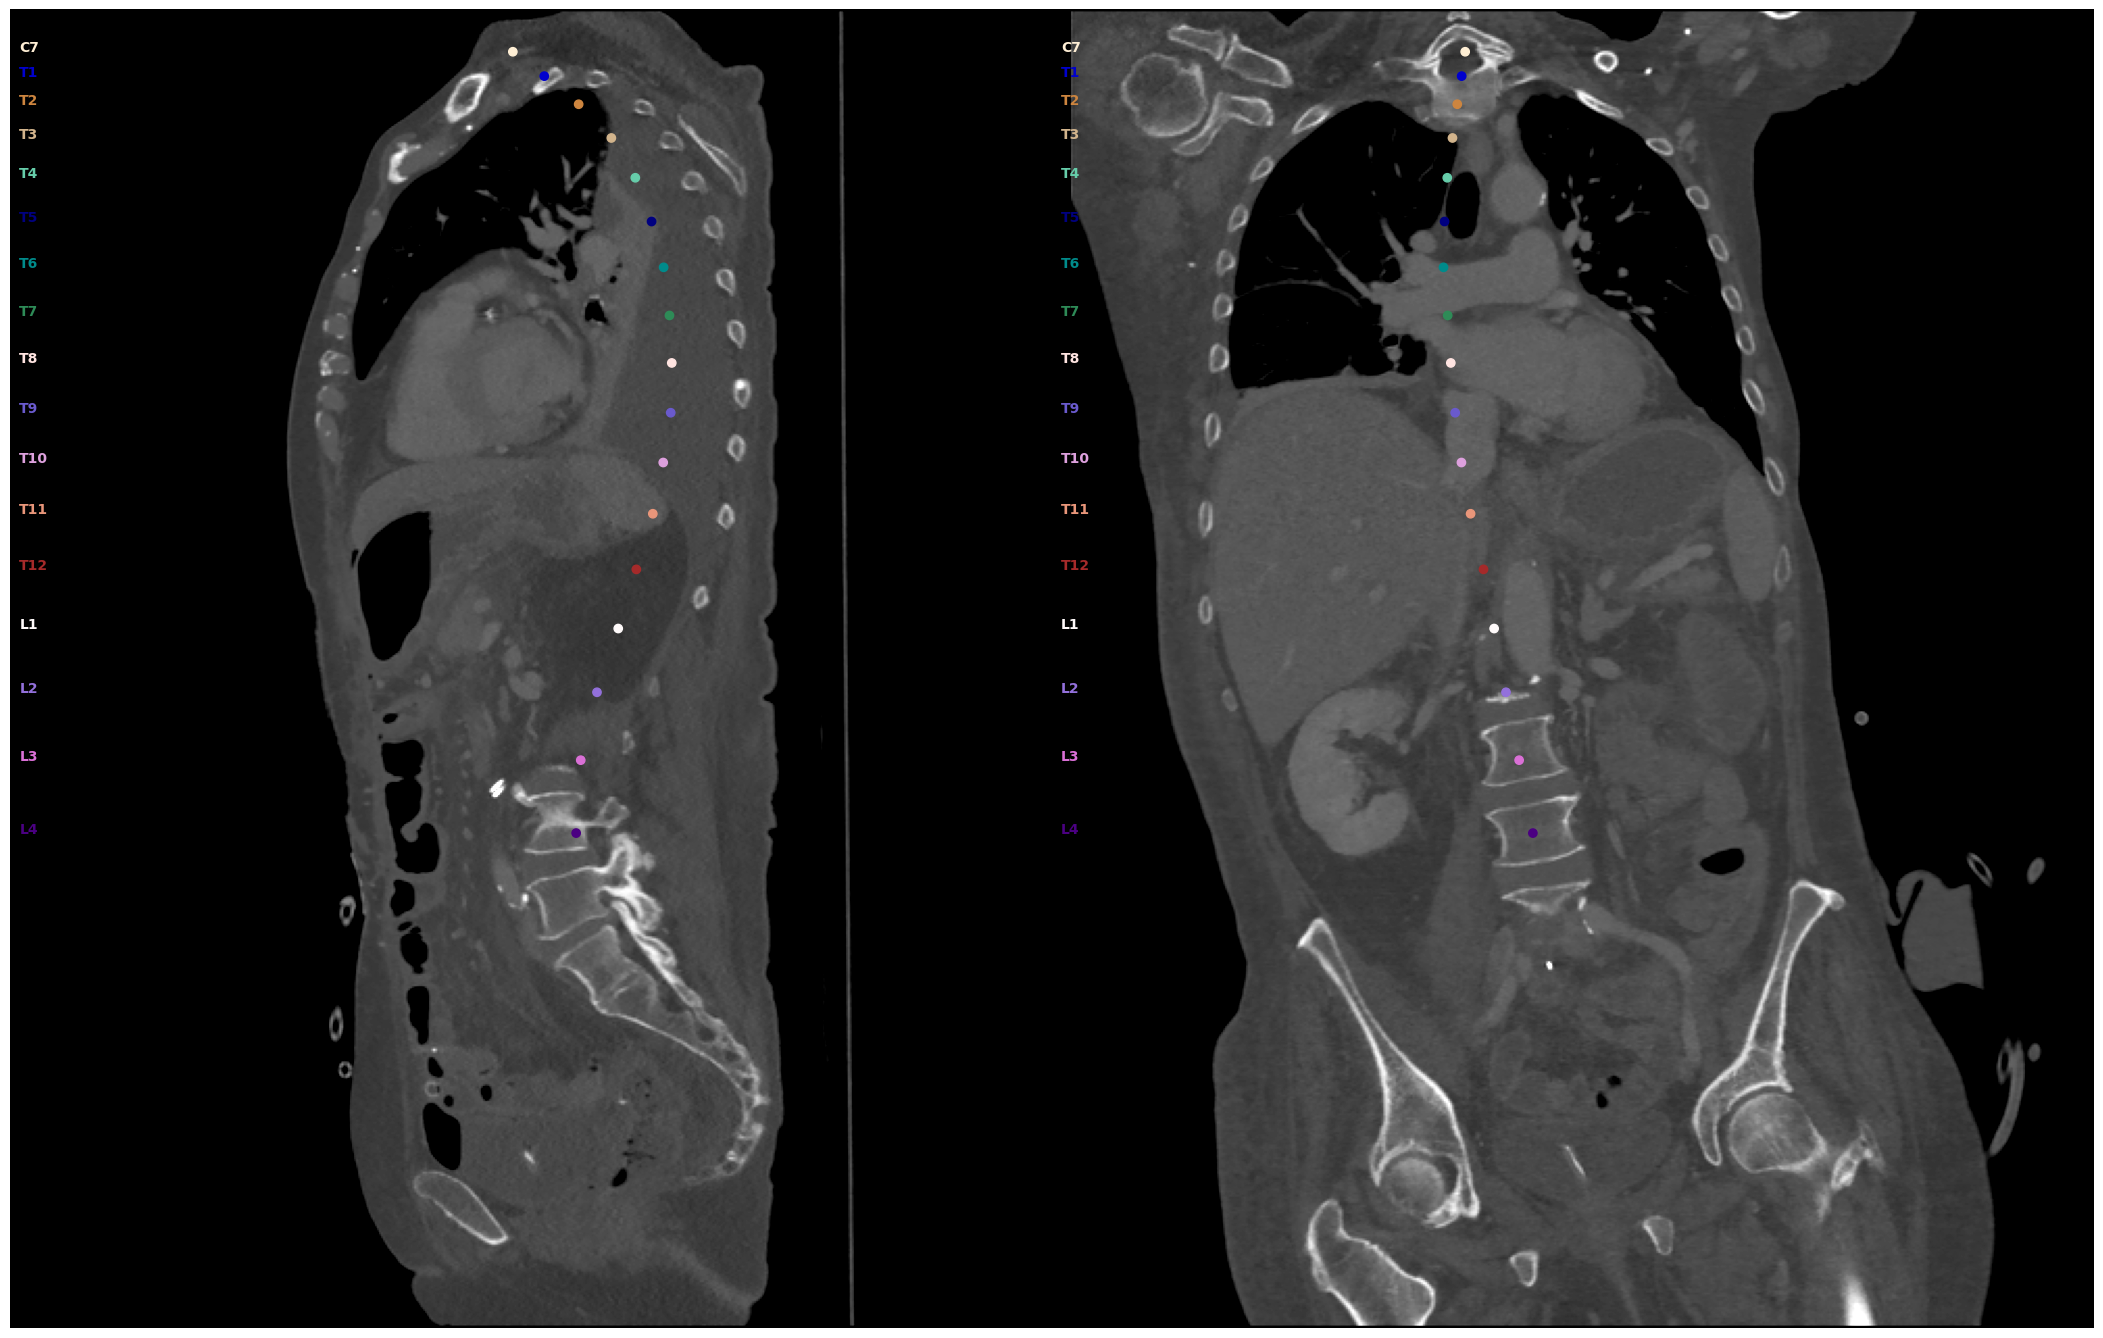

In [32]:
# img_iso = dutils.resample_nib(img_nib, voxel_spacing=(1, 1, 1), order=3)
ctd_iso = dutils.rescale_centroids(ctd_list, img_nib, (1,1,1))

# img_iso = dutils.reorient_to(img_iso, axcodes_to=('I', 'P', 'L'))
ctd_iso = dutils.reorient_centroids_to(ctd_iso, img_iso)

#check img zooms 
# zooms = img_iso.header.get_zooms()
# print('img zooms = {}'.format(zooms))

#check img orientation
# axs_code = nio.ornt2axcodes(nio.io_orientation(img_iso.affine))
# print('img orientation code: {}'.format(axs_code))

#check centroids
# print('new centroids: {}'.format(ctd_iso))

# im_np  = img_iso.get_fdata()

# im_np_sag = im_np[:,:,int(im_np.shape[2]/2)]
# im_np_cor = im_np[:,int(im_np.shape[1]/2),:]

fig, axs = dutils.create_figure(96,im_np_sag, im_np_cor)
axs[0].imshow(im_np_sag, cmap=plt.cm.gray, norm=dutils.wdw_sbone)
dutils.plot_sag_centroids(axs[0], ctd_iso, zooms)

axs[1].imshow(im_np_cor, cmap=plt.cm.gray, norm=dutils.wdw_sbone)
dutils.plot_cor_centroids(axs[1], ctd_iso, zooms)

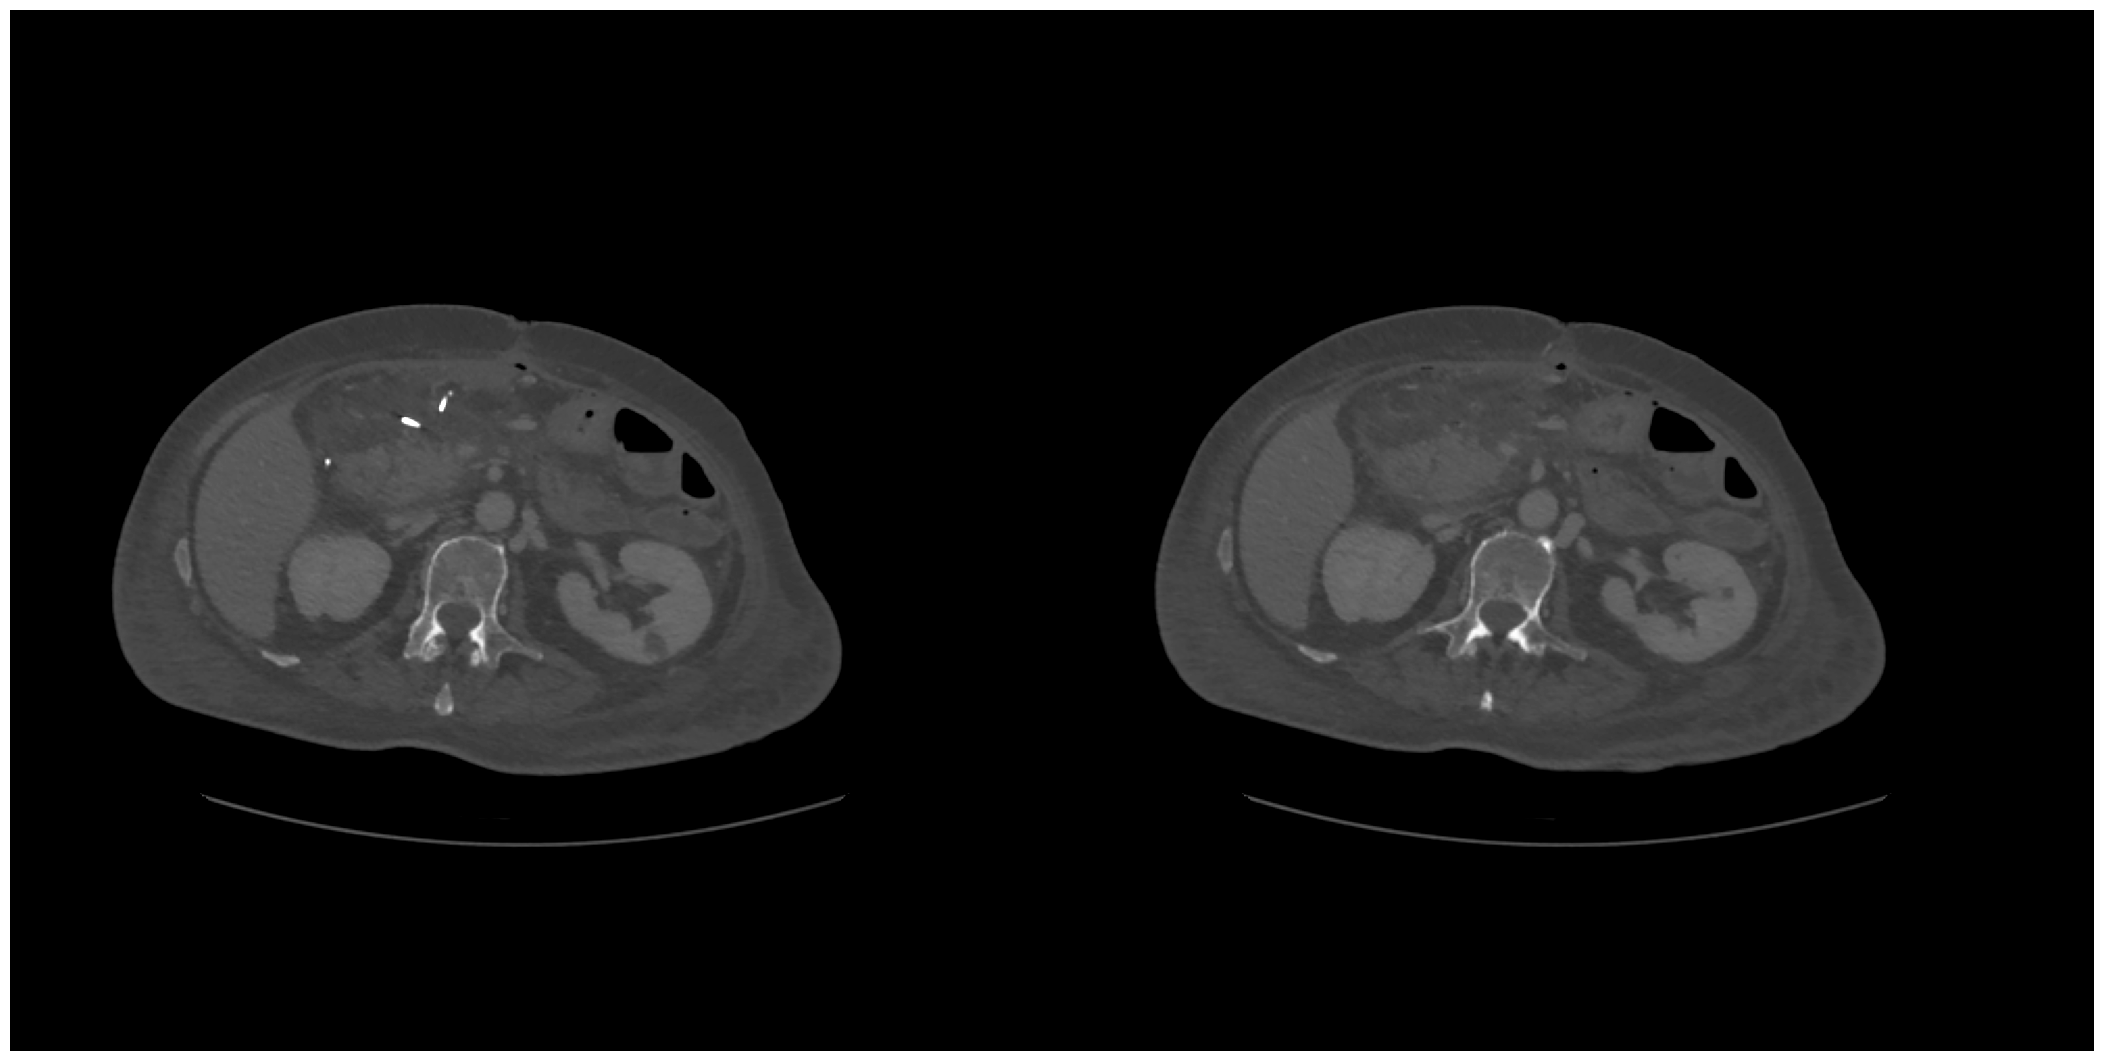

In [33]:
coords = [vtb_coord[1:] for vtb_coord in ctd_iso if vtb_coord[0] == 21][0]
l3 = im_np[int(coords[0]),:,:]

coords_ref = [vtb_coord[1:] for vtb_coord in ctd_iso_ref if vtb_coord[0] == 21][0]
l3_ref = im_np[int(coords_ref[0]),:,:]

fig, axs = dutils.create_figure(96,l3, l3)
axs[0].imshow(l3_ref, cmap=plt.cm.gray, norm=dutils.wdw_sbone)
axs[1].imshow(l3, cmap=plt.cm.gray, norm=dutils.wdw_sbone)